# Rendu SIG : Charlyne LECENE

Consigne : Réaliser une carte des villes de France étant dans la zone d'impact de séismes ayant une amplitude supérieure à 4,5.
On considérera qu'un séisme d'amplitude 4,5 ou plus a une zone d'impact  de 75 km.
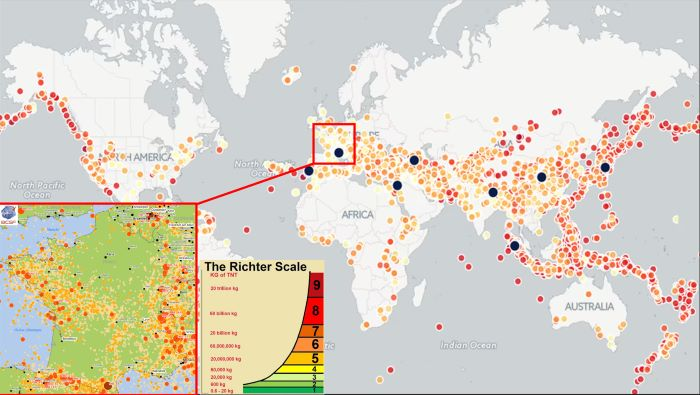

In [1]:
#Importer les bibliothèques
import geopandas as gpd
!pip install mapclassify
import fiona
import folium
import pandas as pd

In [2]:
#Connexion au drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importer des données sur les séismes en France entre 1962 et 2021

In [3]:
#Import le fichier seisme
seismic_data = gpd.read_file("/content/drive/MyDrive/projetSIG/seismic_data.json")
seismic_data.head()

ERROR:fiona.ogrext:second must be in 0..59
Traceback (most recent call last):
  File "fiona/ogrext.pyx", line 359, in fiona.ogrext.FeatureBuilder.build
ValueError: second must be in 0..59
ERROR:fiona.ogrext:second must be in 0..59
Traceback (most recent call last):
  File "fiona/ogrext.pyx", line 359, in fiona.ogrext.FeatureBuilder.build
ValueError: second must be in 0..59
ERROR:fiona.ogrext:second must be in 0..59
Traceback (most recent call last):
  File "fiona/ogrext.pyx", line 359, in fiona.ogrext.FeatureBuilder.build
ValueError: second must be in 0..59


,Catalog,Depth/km,EventID,Magnitude,MagnitudeType,Mw,Time,geometry
0,SI-Hex,6.0,640768,3.4,ML-LDG,2.8,1962-02-02 03:26:03.700000+00:00,POINT (-0.49000 46.19000)
1,SI-Hex,2.0,640769,3.2,ML-LDG,2.6,1962-02-18 05:43:35.600000+00:00,POINT (-0.56000 48.70000)
2,SI-Hex,2.0,640770,3.2,ML-LDG,2.6,1962-02-27 11:35:21+00:00,POINT (-2.74000 46.84000)
3,SI-Hex,5.0,640773,2.9,ML-LDG,2.4,1962-03-07 01:25:39.700000+00:00,POINT (2.67130 47.43730)
4,SI-Hex,15.0,640774,3.7,ML-LDG,3.1,1962-03-14 20:54:47.700000+00:00,POINT (-2.07000 47.79000)


In [4]:
#Supprimer la colonne "time" du DataFrame existant
seismic_data_new = seismic_data.drop(columns=['Time'])
seismic_data_new.head()

,Catalog,Depth/km,EventID,Magnitude,MagnitudeType,Mw,geometry
0,SI-Hex,6.0,640768,3.4,ML-LDG,2.8,POINT (-0.49000 46.19000)
1,SI-Hex,2.0,640769,3.2,ML-LDG,2.6,POINT (-0.56000 48.70000)
2,SI-Hex,2.0,640770,3.2,ML-LDG,2.6,POINT (-2.74000 46.84000)
3,SI-Hex,5.0,640773,2.9,ML-LDG,2.4,POINT (2.67130 47.43730)
4,SI-Hex,15.0,640774,3.7,ML-LDG,3.1,POINT (-2.07000 47.79000)


### Récupérer les séismes en France qui ont eu une magnitude supérieure à 4.5

In [14]:
#Ne garder que les séismes d'une magnitude supérieure à 4.5
seismic_data_mag4 = seismic_data_new[seismic_data_new['Magnitude'] > 4.5]
seismic_data_mag4.shape #Il en reste 49

(49, 7)

In [15]:
#Enregistrement du nouveau fichier dans le drive
seismic_data_mag4.to_file("/content/drive/MyDrive/projetSIG/seismic_data_mag4.shp")

<ipython-input-15-148a0167eb20>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  seismic_data_mag4.to_file("/content/drive/MyDrive/projetSIG/seismic_data_mag4.shp")


In [7]:
seismic_data_mag4.explore(column = "Magnitude", style_kwds=dict(color="red"), name='Séismes de magnitude supérieure à 4.5')

In [8]:
#Vérifier et changer si nécessaire le système de coordonnées
print(seismic_data_mag4.crs)

EPSG:4326


In [16]:
seismic_data_mag4 = seismic_data_mag4.to_crs(3857)
print(seismic_data_mag4.crs)

EPSG:3857


### Créer une zone tampon de 75km autour des épicentres des séismes

In [17]:
#Créer un buffer de 75km autour des épicentres des séismes
buffer_75km = seismic_data_mag4.buffer(75000)
m = buffer_75km.explore(style_kwds=dict(color="yellow"))
seismic_data_mag4.explore(m=m, column = "Magnitude", style_kwds=dict(color="red"), name='Séismes de magnitude supérieure à 5')
folium.LayerControl().add_to(m)
m

In [18]:
buffer_75km.to_file("/content/drive/MyDrive/projetSIG/buffer_75km.shp") #enregistrement de la coucher du buffer

### Récupérer des données sur les communes de France

In [19]:
communes = gpd.read_file("/content/drive/MyDrive/projetSIG/commune-frmetdrom.zip")
communes.head()

,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,TYPE,geometry
0,COMMUNE_0000000009747703,Antully,ANTULLY,71010,Commune simple,869.0,02,1,71,27,200070530,COM,"POLYGON ((4.42739 46.92275, 4.42745 46.92262, ..."
1,COMMUNE_0000000009734075,Le Tremblay-Omonville,LE TREMBLAY-OMONVILLE,27658,Commune simple,369.0,15,2,27,28,242700607,COM,"POLYGON ((0.90536 49.10568, 0.90375 49.10801, ..."
2,COMMUNE_0000000009730209,Vaux-lès-Mouzon,VAUX-LES-MOUZON,08466,Commune simple,69.0,03,3,08,44,240800847,COM,"POLYGON ((5.15280 49.57652, 5.15277 49.57688, ..."
3,COMMUNE_0000000009742448,Anchenoncourt-et-Chazel,ANCHENONCOURT-ET-CHAZEL,70017,Commune simple,240.0,11,2,70,27,200041879,COM,"POLYGON ((6.14568 47.84562, 6.14458 47.84435, ..."
4,COMMUNE_0000002324290054,Culoz-Béon,CULOZ-BEON,01138,Commune simple,3426.0,10,1,01,84,200040350,COM,"POLYGON ((5.80753 45.86064, 5.80739 45.86051, ..."


In [20]:
communes.shape #Il y a 34 987 communes en France au 19 juillet 2023

(34987, 13)

### Sélectionner les communes qui se trouvent dans une zone à risque

In [21]:
#Mettre les couches dans le même système de coordonnées
buffer_75km = buffer_75km.to_crs(3857).to_file("/content/drive/MyDrive/projetSIG/buffer_75km.shp")
communes = communes.to_crs(3857).to_file("/content/drive/MyDrive/projetSIG/communes.shp")

In [22]:
#Sélectionner les communes situées dans des zones à risque
buffer_75km = gpd.read_file("/content/drive/MyDrive/projetSIG/buffer_75km.shp")
communes = gpd.read_file("/content/drive/MyDrive/projetSIG/communes.shp")

In [24]:
# Sélectionnez les communes qui se trouvent dans la zone à risque
danger_communes = gpd.sjoin(communes, buffer_75km, how='inner', op='within').to_file("/content/drive/MyDrive/projetSIG/danger_communes.shp")
#danger_communes = gpd.overlay(communes, buffer_75km, how='intersection').to_file("/content/drive/MyDrive/projetSIG/danger_communes.shp")
danger_communes = gpd.read_file("/content/drive/MyDrive/projetSIG/danger_communes.shp")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-24-dee634bf1e3e>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  danger_communes = gpd.sjoin(communes, buffer_75km, how='inner', op='within').to_file("/content/drive/MyDrive/projetSIG/danger_communes.shp")


In [25]:
danger_communes.shape

(16306, 15)

In [26]:
#Sélectionner les villes de plus de 2000 habitants
#donnee_filtree = data[data['nom_champ'] == 'valeur_cherchee']
villes_France = danger_communes[danger_communes['POPULATION'] > 2000]
villes_France = villes_France.to_file("/content/drive/MyDrive/projetSIG/villes_France.shp")

In [27]:
#Convertir les polygons en points
villes_France = gpd.read_file("/content/drive/MyDrive/projetSIG/villes_France.shp")
villes_France.shape

(2273, 15)

In [28]:
villes_France.head()

,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,TYPE,index_righ,FID,geometry
0,COMMUNE_0000000009741807,Saulxures-sur-Moselotte,SAULXURES-SUR-MOSELOTTE,88447,Commune simple,2514.0,01,3,88,44,200096634,COM,15,15,"POLYGON ((754500.972 6093504.624, 754230.988 6..."
1,COMMUNE_0000000009740765,Chantraine,CHANTRAINE,88087,Commune simple,3190.0,05,1,88,44,200068757,COM,15,15,"POLYGON ((712819.767 6131066.740, 712800.866 6..."
2,COMMUNE_0000000009740744,Granges-Aumontzey,GRANGES-AUMONTZEY,88218,Commune simple,2605.0,07,3,88,44,200096642,COM,15,15,"POLYGON ((761658.180 6122063.806, 761595.756 6..."
3,COMMUNE_0000000009739090,Étival-Clairefontaine,ETIVAL-CLAIREFONTAINE,88165,Commune simple,2558.0,11,3,88,44,200071066,COM,15,15,"POLYGON ((767540.500 6166032.521, 767497.657 6..."
4,COMMUNE_0000000009741493,Saint-Étienne-lès-Remiremont,SAINT-ETIENNE-LES-REMIREMONT,88415,Commune simple,3827.0,12,1,88,44,200068377,COM,15,15,"POLYGON ((737623.044 6109327.508, 737607.176 6..."


In [29]:
#Afficher les villes de plus de 5000 habitants situées dans une zone à risque
villes_France.explore(column = "NOM", style_kwds=dict(color="blue"), name='Villes de plus de 2000 habitants situées dans une zone à risque')

In [30]:
#Afficher toutes les données ensembles
m = buffer_75km.explore(style_kwds=dict(color="yellow"))
seismic_data_mag4.explore(m=m, column = "Magnitude", style_kwds=dict(color="red"), name='Séismes de magnitude supérieure à 4.5')
villes_France.explore(m=m, column = "NOM", style_kwds=dict(color="blue"), name='Villes de plus de 2000 habitants situées dans une zone à risque')
folium.LayerControl().add_to(m)
m

In [31]:
#Enregistrement et exportation de la carte
from google.colab import files
m.save("CarteRenduSIG.html")
files.download("CarteRenduSIG.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>